# Time Series Forecasting Model - REPL

This notebook demonstrates time series forecasting using the `TSFM` library.

## 1. Import Libraries

In [2]:
import pandas as pd

from tsfm import Model

## 2. Load and Prepare Data

In [ ]:
cols_to_drop = "Negotiated wages including"
df = pd.read_csv("data/data.csv").dropna().rename(columns={"Unnamed: 0": "dt"})
df["dt"] = pd.to_datetime(df["dt"], format="%Y%b").add(pd.offsets.MonthEnd(0))
df.index = df.pop("dt")
df = df.drop(cols_to_drop, axis=1).astype(float).sort_index()

## 3. Build Model and Generate Predictions

In [ ]:
mdl_name = "moirai"
mdl = Model.build(name=mdl_name)

y = "Negotiated wages excluding"
X = list(df.columns[1:])
oos_start = "2020-01-31"
res = mdl.pred(df=df, y=y, X=X, ctx_len=100, horizon=12, oos_start=oos_start)

## 4. Analyze Results

In [8]:
res.summary()

================== Forecast Results Summary ==================
Observations: 672
Cutoff range : 2019-12-31  -  2024-07-31
OOS range    : 2020-01-31  -  2025-07-31
Horizons     : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
Meta         : model=moirai | oos_start=2020-01-31
--------------------------------------------------------------
         rmsfe    mae     me
horizon                     
1       0.4121 0.2545 0.0415
2       0.5548 0.3687 0.1160
3       0.7106 0.5056 0.1665
4       0.8384 0.6112 0.2220
5       1.0010 0.6958 0.3041
6       1.1151 0.7667 0.3839
7       1.2543 0.8602 0.4865
8       1.3609 0.9221 0.5143
9       1.4936 1.0180 0.6420
10      1.6848 1.1660 0.7507
11      1.7616 1.2567 0.8371
12      1.8543 1.3236 0.8838
average 1.1701 0.8124 0.4457


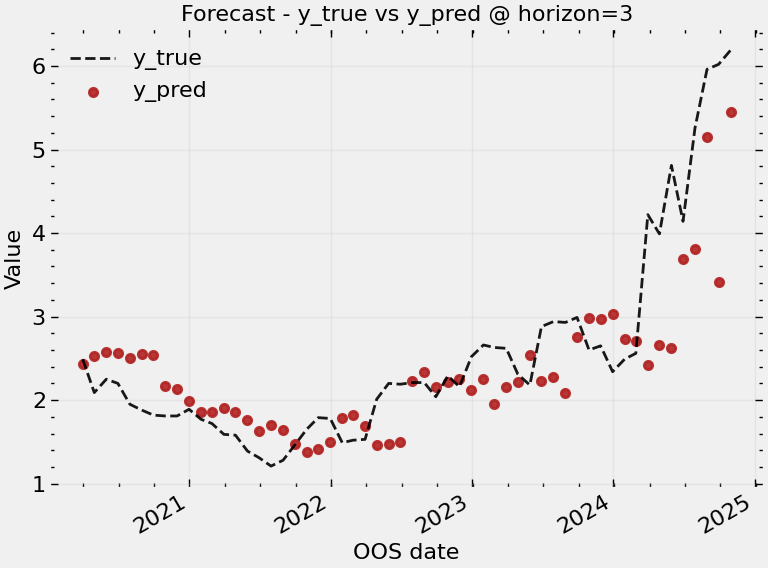

In [9]:
res.plot_actual_vs_pred(horizon=3)